In [642]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set(style="ticks")

%matplotlib inline

from numpy import sort

from datetime import datetime
import time

In [643]:
# loading data 
customers = pd.read_csv("olist_customers_dataset.csv")
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
order_items = pd.read_csv("olist_order_items_dataset.csv")
order_payments = pd.read_csv("olist_order_payments_dataset.csv")
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv("olist_orders_dataset.csv")
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
product_categories = pd.read_csv('product_category_name_translation.csv')

In [644]:
# Customers
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [645]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [646]:
customers.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

Text(0.5, 1.0, 'customers by state')

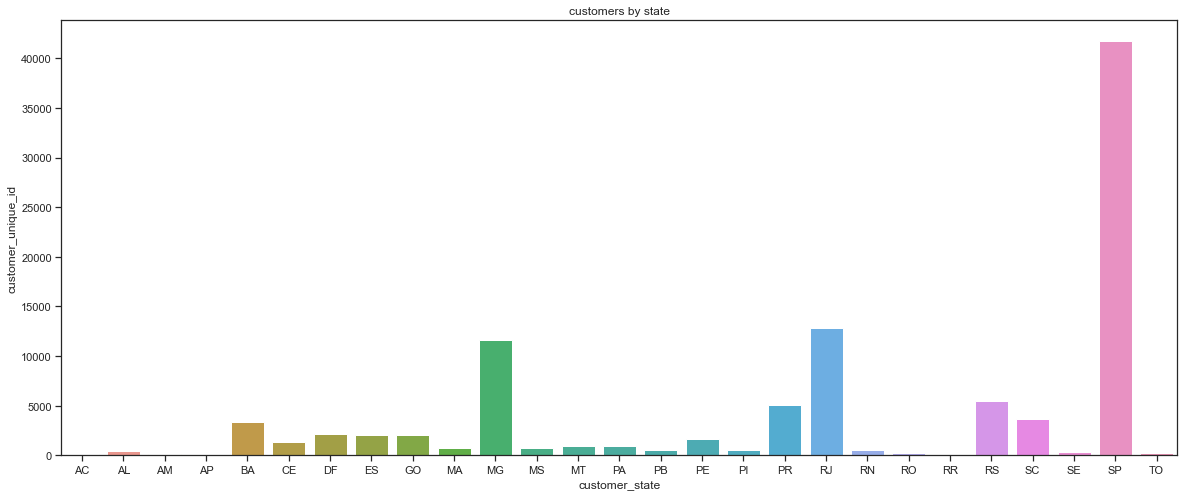

In [647]:
# customers by state
fig = plt.figure(figsize=(20, 8))
sns.barplot(data = customers.groupby('customer_state').count()\
              ['customer_unique_id'].reset_index(), 
                  x = 'customer_state', y = 'customer_unique_id')
plt.title('customers by state')

In [648]:
# Geolocation
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [649]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [650]:
geolocation.nunique()

geolocation_zip_code_prefix     19015
geolocation_lat                717358
geolocation_lng                717613
geolocation_city                 8011
geolocation_state                  27
dtype: int64

In [651]:
# Orders
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [652]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [653]:
order_items.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

Text(0.5, 1.0, 'Nb of items in same order')

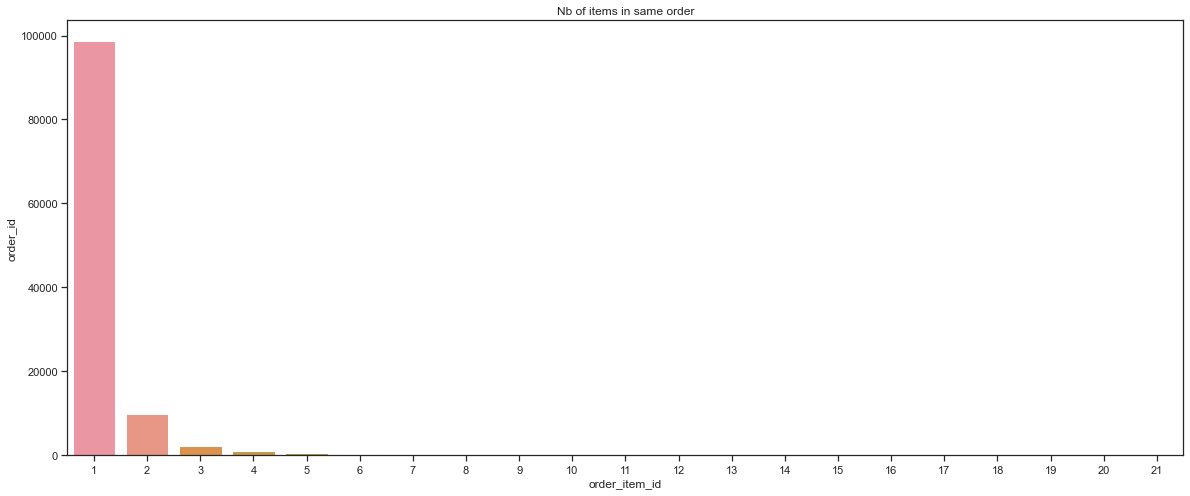

In [654]:
fig = plt.figure(figsize=(20, 8))
sns.barplot(data = order_items.groupby('order_item_id').count()\
            ['order_id'].reset_index(), x = 'order_item_id',
            y = 'order_id')
plt.title("Nb of items in same order")


In [655]:
order_items.drop('shipping_limit_date', 
                  axis= 1, inplace = True)

In [656]:
# payments
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [657]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [658]:
order_payments.nunique()

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

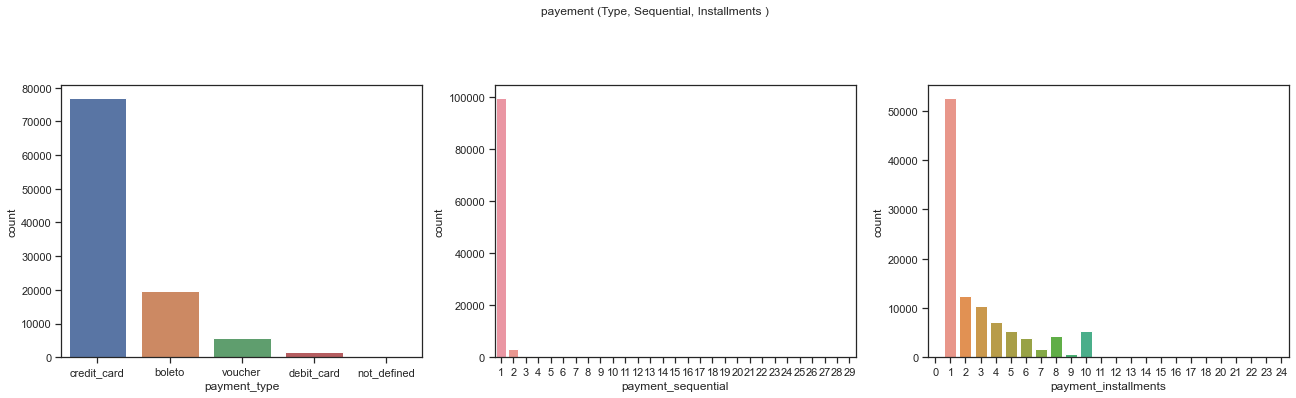

In [659]:
# displaying order payement
fig, axs = plt.subplots(1, 3, figsize=(22, 5))
sns.countplot(x='payment_type', data=order_payments, ax=axs[0])
sns.countplot(x='payment_sequential', data=order_payments, ax=axs[1])
sns.countplot(x='payment_installments', data=order_payments, ax=axs[2])

plt.suptitle('payement (Type, Sequential, Installments )', y=1.1)
plt.show()

In [660]:
# Reviews
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [661]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41753 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [662]:
order_reviews.nunique()

review_id                  99173
order_id                   99441
review_score                   5
review_comment_title        4600
review_comment_message     36921
review_creation_date         637
review_answer_timestamp    99010
dtype: int64

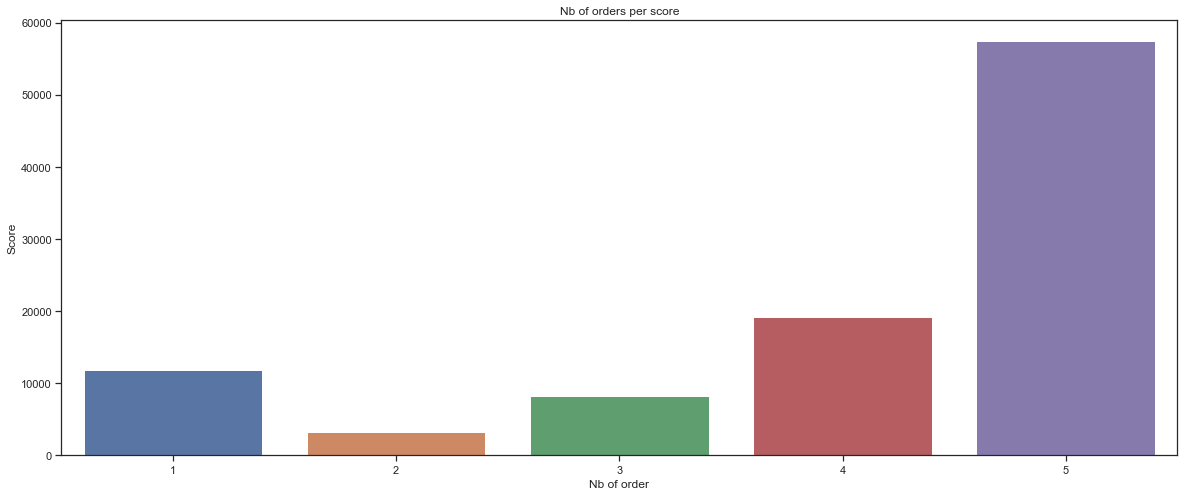

In [663]:
# orders per score
plt.figure(figsize = (20,8))
sns.barplot(data = order_reviews.groupby('review_score').count()['order_id'].reset_index(), x = 'review_score', y = 'order_id')
plt.title('Nb of orders per score')
plt.xlabel('Nb of order')
plt.ylabel('Score');

In [664]:
# we keep only the useful variables for our analysis:
order_reviews = order_reviews[['review_id', 'order_id', 'review_score']]

In [665]:
# Orders
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [666]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [667]:
orders.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

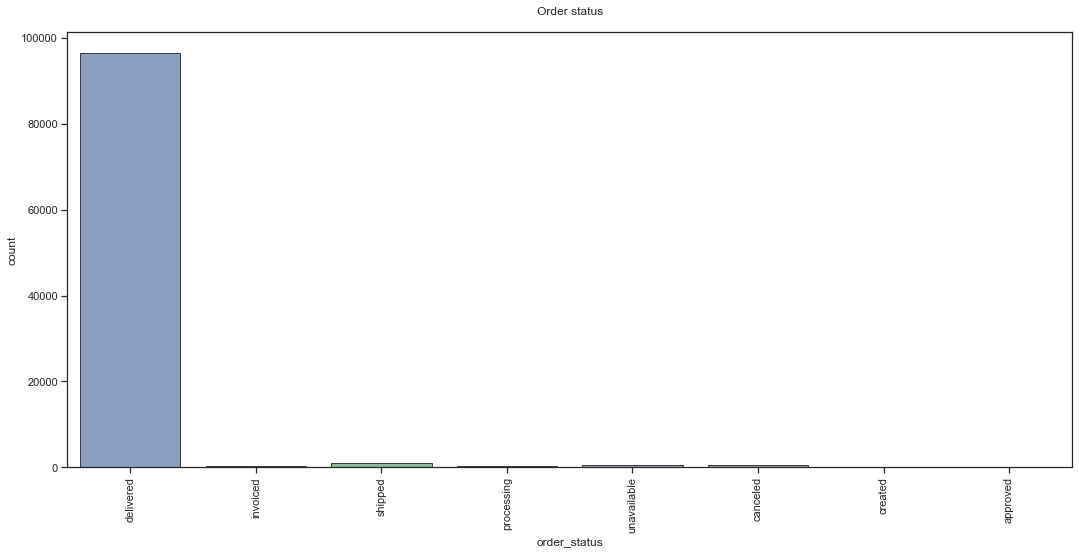

In [565]:
# Order_status
fig = plt.figure(figsize=(18, 8))
sns.countplot(data=orders, x="order_status",
              edgecolor="black", alpha=0.7)
plt.xticks(range(0, orders["order_status"].nunique()),
           orders["order_status"].unique(),
           rotation=90)
plt.title(f"Order status\n")
plt.show()

In [566]:
# We keep only the delivered orders
orders = orders[orders["order_status"] == "delivered"]

In [567]:
# We delete the useless variables
orders.drop(['order_approved_at', 
             'order_delivered_carrier_date', 
             'order_estimated_delivery_date',
            'order_status'], axis= 1, inplace = True)

In [669]:
# Converting date columns to datetime
datetime_column = ["order_purchase_timestamp", "order_delivered_customer_date"]
for col in datetime_column:
    orders[col] = pd.to_datetime(orders[col], format='%Y-%m-%d %H:%M:%S')

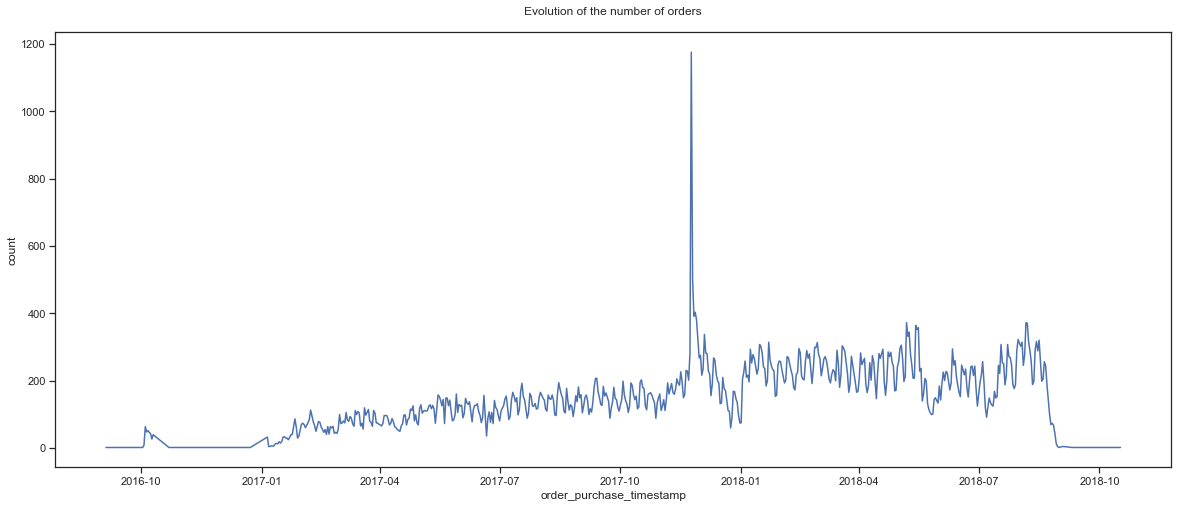

In [670]:
# Evolution of the number of orders
orders_per_days = orders.groupby(orders["order_purchase_timestamp"].dt.date)\
                                    .count()["order_id"]
    
fig = plt.figure(figsize=(20, 8))

ax = orders_per_days.plot()
ax.set_ylabel("count")
plt.title(f"Evolution of the number of orders\n")
plt.show()

In [671]:
# Engineering new/essential columns
orders['order_purchase_year'] = orders.order_purchase_timestamp\
                                  .apply(lambda x: x.year)
orders['order_purchase_month'] = orders.order_purchase_timestamp\
                                  .apply(lambda x: x.month)
orders['order_purchase_dayofweek'] = orders.order_purchase_timestamp\
                                        .apply(lambda x: x.dayofweek)

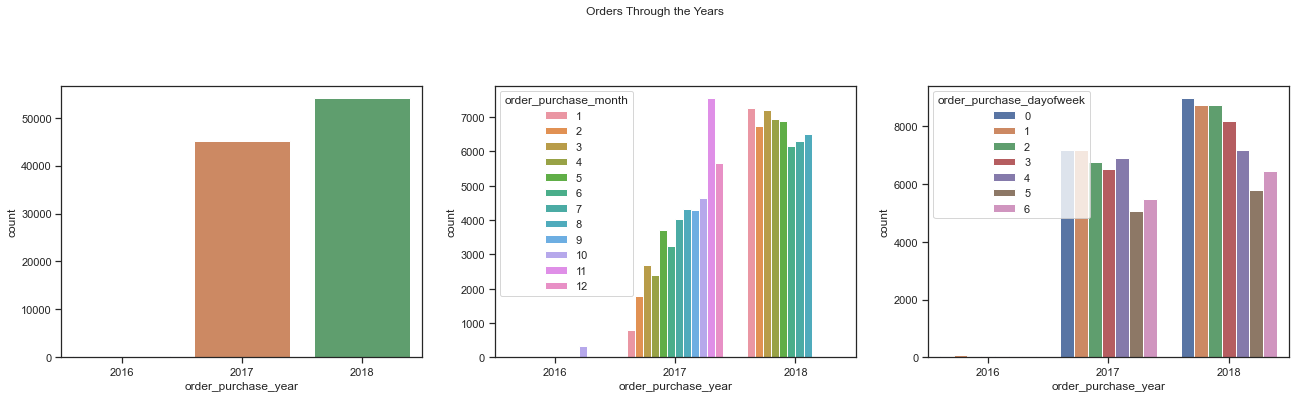

In [672]:
# Creating new datasets for each year
orders_2016 = orders.query('order_purchase_year=="2016"')
orders_2017 = orders.query('order_purchase_year=="2017"')
orders_2018 = orders.query('order_purchase_year=="2018"')

# Displaying total orders in years, comparitive year on month, and month on days of the week
fig, axs = plt.subplots(1, 3, figsize=(22, 5))
sns.countplot(x='order_purchase_year', data=orders, ax=axs[0])
sns.countplot(x='order_purchase_year', data=orders, ax=axs[1], 
            hue='order_purchase_month')
sns.countplot(x='order_purchase_year', data=orders, 
              ax=axs[2], hue='order_purchase_dayofweek')

# Format_spines(ax, right_border=False)
plt.suptitle('Orders Through the Years', y=1.1)
plt.show()


In [673]:
# commands with date type change( year-month-day h:min:s)
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,order_purchase_month,order_purchase_dayofweek
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017,10,0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018,7,1
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018,8,2
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017,11,5
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018,2,1


In [674]:
# Products
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [675]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [676]:
products.nunique()

product_id                    32951
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

In [677]:
# We keep only the relevant variables
products=products[['product_id','product_category_name']]

In [678]:
# Categories of products
product_categories.head(5)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [679]:
product_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [680]:
product_categories.nunique()

product_category_name            71
product_category_name_english    71
dtype: int64

In [681]:
products = pd.merge(products, product_categories, 
                     on='product_category_name', how='left')
# Delete 'product_category_name' column
del products['product_category_name']
# Delete  the categories_df dataframe
del product_categories
# Rename the column
products.rename(columns={'product_category_name_english': 'product_category'}, 
                 inplace=True)

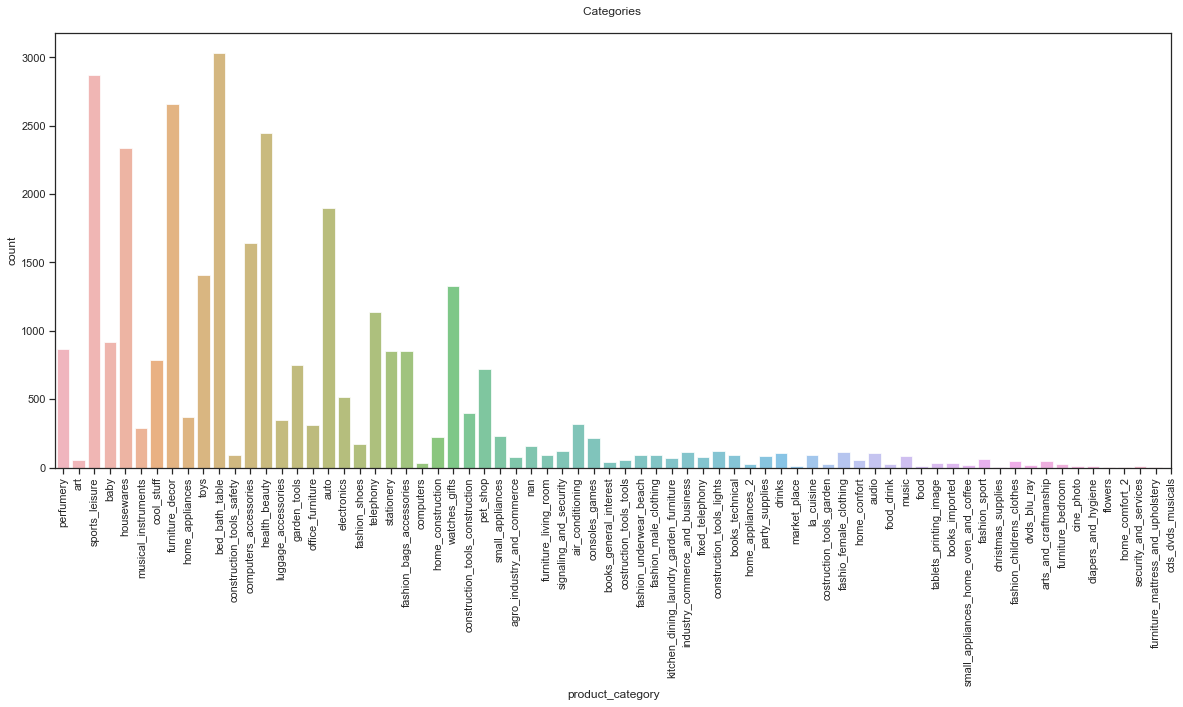

In [682]:
 # products by categories

fig = plt.figure(figsize=(20, 8))
sns.countplot(data=products, x="product_category",
              alpha=0.7)
plt.xticks(range(0, products["product_category"].nunique()+1),
           products["product_category"].unique(),
           rotation=90)
plt.title(f"Categories \n")
plt.show()

In [683]:
# Definition of the new categories
products['product_category_name'] = np.where((products['product_category'].str.contains("fashio|luggage")==True),
                                    'fashion_clothing_accessories',
                           np.where((products['product_category'].str.contains("health|beauty|perfum")==True),
                                    'health_beauty',
                           np.where((products['product_category'].str.contains("toy|baby|diaper")==True),
                                     'toys_baby',
                           np.where((products['product_category'].str.contains("book|cd|dvd|media")==True),
                                     'books_cds_media',
                           np.where((products['product_category'].str.contains("grocer|food|drink")==True), 
                                     'groceries_food_drink',
                           np.where((products['product_category'].str.contains("phon|compu|tablet|electro|consol")==True), 
                                     'technology',
                           np.where((products['product_category'].str.contains("home|furnitur|garden|bath|house|applianc")==True), 
                                                                                          'home_furniture',
                           np.where((products['product_category'].str.contains("flow|gift|stuff")==True),
                                     'flowers_gifts',
                           np.where((products['product_category'].str.contains("sport")==True),
                                     'sport',
                                     'other')))))))))

In [684]:
# drop product_category_name column
products.drop("product_category", axis=1, inplace=True)

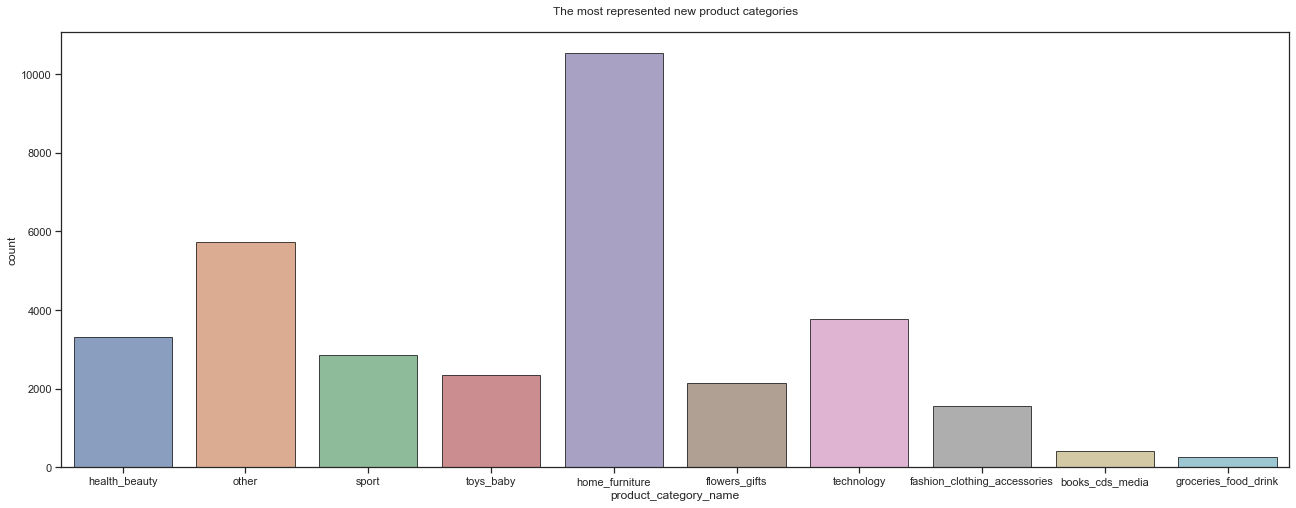

In [685]:
# Plot categories count in dataset
fig = plt.figure(figsize=(22, 8))
sns.countplot(data=products, x="product_category_name",
              edgecolor="black",
               alpha=0.7)
plt.xticks(range(0, products["product_category_name"].nunique()),
           products["product_category_name"].unique())
plt.title(f"The most represented new product categories\n")
plt.show()

In [686]:
# Sellers
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [687]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [688]:
sellers.nunique()

seller_id                 3095
seller_zip_code_prefix    2246
seller_city                611
seller_state                23
dtype: int64

In [689]:
products.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,health_beauty
1,3aa071139cb16b67ca9e5dea641aaa2f,other
2,96bd76ec8810374ed1b65e291975717f,sport
3,cef67bcfe19066a932b7673e239eb23d,toys_baby
4,9dc1a7de274444849c219cff195d0b71,home_furniture


In [690]:
# Displaying data shape

dataset = {
    'Customers': customers,
    'Items': order_items,
    'Payments': order_payments,
    'Orders': orders,
    'Products' : products,
    'Reviews'  : order_reviews
}

for i, j in dataset.items():
    print(f'{i}', (list(j.shape)))

Customers [99441, 5]
Items [112650, 6]
Payments [103886, 5]
Orders [99441, 11]
Products [32951, 2]
Reviews [100000, 3]


In [691]:
# Displaying dataset column names
for i, j in dataset.items():
    print(f'{i}', f'{list(j.columns)}\n')

Customers ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']

Items ['order_id', 'order_item_id', 'product_id', 'seller_id', 'price', 'freight_value']

Payments ['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']

Orders ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'order_purchase_year', 'order_purchase_month', 'order_purchase_dayofweek']

Products ['product_id', 'product_category_name']

Reviews ['review_id', 'order_id', 'review_score']



In [692]:
# checking for null values in datasets
for i, j in dataset.items():
    print(f'{i}: {j.isnull().any().any()}')
Customers: False

Customers: False
Items: False
Payments: False
Orders: True
Products: False
Reviews: False


In [693]:
# taking count for dataset with missing values
for i, j in dataset.items():
    if j.isnull().any().any():
        print(f'{i}', (list(j.shape)),'\n')
        print(f'{j.isnull().sum()}\n')

Orders [99441, 11] 

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
order_purchase_year                 0
order_purchase_month                0
order_purchase_dayofweek            0
dtype: int64



In [694]:
# creating master dataframe 
order_payments.head()
df1 = order_payments.merge(order_items, on='order_id')
df2 = df1.merge(orders, on='order_id')
df3 = df2.merge(customers, on='customer_id')
df4 = df3.merge(products, on='product_id')
df = df4.merge(order_reviews, on='order_id')

In [695]:
df.shape

(118315, 27)

In [696]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118315 entries, 0 to 118314
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       118315 non-null  object        
 1   payment_sequential             118315 non-null  int64         
 2   payment_type                   118315 non-null  object        
 3   payment_installments           118315 non-null  int64         
 4   payment_value                  118315 non-null  float64       
 5   order_item_id                  118315 non-null  int64         
 6   product_id                     118315 non-null  object        
 7   seller_id                      118315 non-null  object        
 8   price                          118315 non-null  float64       
 9   freight_value                  118315 non-null  float64       
 10  customer_id                    118315 non-null  object        
 11  

In [697]:
df.nunique()

order_id                         98665
payment_sequential                  29
payment_type                         4
payment_installments                24
payment_value                    28938
order_item_id                       21
product_id                       32951
seller_id                         3095
price                             5968
freight_value                     6999
customer_id                      98665
order_status                         7
order_purchase_timestamp         98111
order_approved_at                90173
order_delivered_carrier_date     81016
order_delivered_customer_date    95663
order_estimated_delivery_date      449
order_purchase_year                  3
order_purchase_month                12
order_purchase_dayofweek             7
customer_unique_id               95419
customer_zip_code_prefix         14976
customer_city                     4110
customer_state                      27
product_category_name               10
review_id                

In [698]:
df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,price,freight_value,...,order_purchase_year,order_purchase_month,order_purchase_dayofweek,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,review_id,review_score
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,79.80,19.53,...,2018,4,2,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG,home_furniture,4ce650e117a5b292bf5ea980a61eb61e,1
1,d86305c284cecff56c7ee9d3fbd4f8d6,1,credit_card,4,93.72,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,79.80,13.92,...,2018,4,6,550a1a0e8ad53e4147e6c761b5699c2b,14781,barretos,SP,home_furniture,ec9d84039245b981ebdbf7d16c723b6e,4
2,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,1,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,17.00,7.39,...,2018,6,1,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP,other,ad2036caca61484fc435d7e673c020f2,5
3,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,1,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,56.99,8.72,...,2017,12,1,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,SP,health_beauty,bcddfa0f7d2e54cfc74bae4f01b84d92,5
4,1966886b80f14d0588adf6406afb0026,1,debit_card,1,68.89,1,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,56.99,11.90,...,2017,8,1,8a9a81879cbda02fa71d4addfb1a446c,37550,pouso alegre,MG,health_beauty,3b3b349f1583be5cb1bc0f0ddaea63e6,1


In [598]:
# order per customer
order_per_customer = df.groupby("customer_unique_id").agg({"order_id": "nunique"})

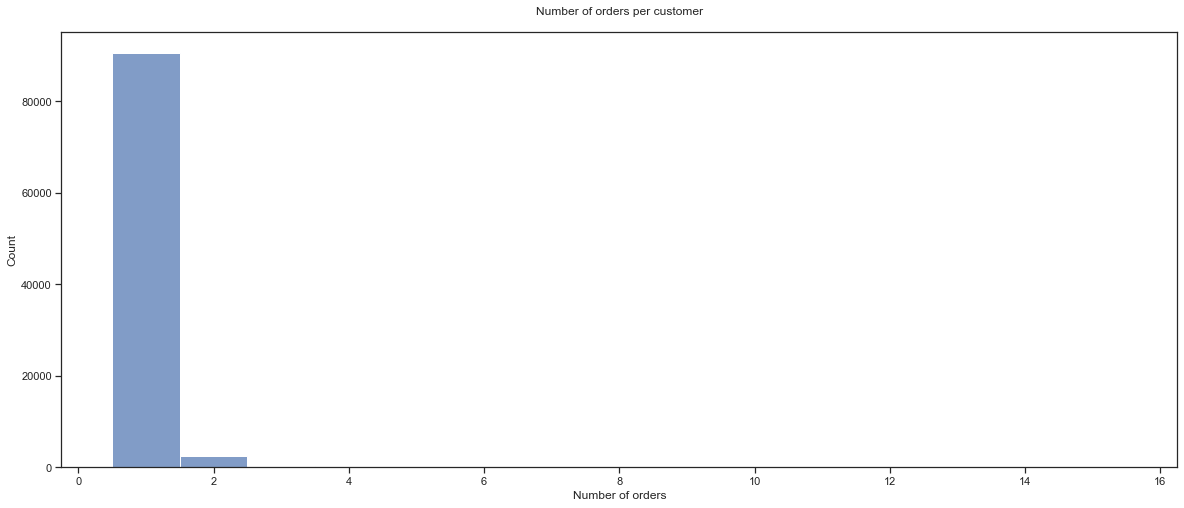

In [599]:
# Number of orders per customer
fig = plt.figure(figsize=(20, 8))
sns.histplot(order_per_customer,
             x="order_id",
             discrete=True, alpha=0.7)
plt.xlabel("Number of orders")
plt.title(f"Number of orders per customer\n")
plt.show()

In [600]:
# category per customer
category_per_customer = df.groupby(["customer_unique_id", "product_category_name"])\
                        .agg({"order_item_id": "count"}).unstack() 
category_per_customer

order_item_id                               \
product_category_name            books_cds_media fashion_clothing_accessories   
customer_unique_id                                                              
0000366f3b9a7992bf8c76cfdf3221e2             NaN                          NaN   
0000b849f77a49e4a4ce2b2a4ca5be3f             NaN                          NaN   
0000f46a3911fa3c0805444483337064             NaN                          NaN   
0000f6ccb0745a6a4b88665a16c9f078             NaN                          NaN   
0004aac84e0df4da2b147fca70cf8255             NaN                          NaN   
...                                          ...                          ...   
fffcf5a5ff07b0908bd4e2dbc735a684             NaN                          NaN   
fffea47cd6d3cc0a88bd621562a9d061             NaN                          NaN   
ffff371b4d645b6ecea244b27531430a             NaN                          NaN   
ffff5962728ec6157033ef9805bacc48             NaN                          NaN   
ffffd2657e2aad2907e67c3e9daecbeb             NaN                          NaN   

                                                                     \
product_category_name            flowers_gifts groceries_food_drink   
customer_unique_id                                                    
0000366f3b9a7992bf8c76cfdf3221e2           NaN                  NaN   
0000b849f77a49e4a4ce2b2a4ca5be3f           NaN                  NaN   
0000f46a3911fa3c0805444483337064           NaN                  NaN   
0000f6ccb0745a6a4b88665a16c9f078           NaN                  NaN   
0004aac84e0df4da2b147fca70cf8255           NaN                  NaN   
...                                        ...                  ...   
fffcf5a5ff07b0908bd4e2dbc735a684           NaN                  NaN   
fffea47cd6d3cc0a88bd621562a9d061           NaN                  NaN   
ffff371b4d645b6ecea244b27531430a           NaN                  NaN   
ffff5962728ec6157033ef9805bacc48           1.0                  NaN   
ffffd2657e2aad2907e67c3e9daecbeb           NaN                  NaN   

                                                                           \
product_category_name            health_beauty home_furniture other sport   
customer_unique_id                                                          
0000366f3b9a7992bf8c76cfdf3221e2           NaN            1.0   NaN   NaN   
0000b849f77a49e4a4ce2b2a4ca5be3f           1.0            NaN   NaN   NaN   
0000f46a3911fa3c0805444483337064           NaN            NaN   1.0   NaN   
0000f6ccb0745a6a4b88665a16c9f078           NaN            NaN   NaN   NaN   
0004aac84e0df4da2b147fca70cf8255           NaN            NaN   NaN   NaN   
...                                        ...            ...   ...   ...   
fffcf5a5ff07b0908bd4e2dbc735a684           2.0            NaN   NaN   NaN   
fffea47cd6d3cc0a88bd621562a9d061           NaN            NaN   NaN   NaN   
ffff371b4d645b6ecea244b27531430a           NaN            NaN   1.0   NaN   
ffff5962728ec6157033ef9805bacc48           NaN            NaN   NaN   NaN   
ffffd2657e2aad2907e67c3e9daecbeb           1.0            NaN   NaN   NaN   

                                                       
product_category_name            technology toys_baby  
customer_unique_id                                     
0000366f3b9a7992bf8c76cfdf3221e2        NaN       NaN  
0000b849f77a49e4a4ce2b2a4ca5be3f        NaN       NaN  
0000f46a3911fa3c0805444483337064        NaN       NaN  
0000f6ccb0745a6a4b88665a16c9f078        1.0       NaN  
0004aac84e0df4da2b147fca70cf8255        1.0       NaN  
...                                     ...       ...  
fffcf5a5ff07b0908bd4e2dbc735a684        NaN       NaN  
fffea47cd6d3cc0a88bd621562a9d061        NaN       1.0  
ffff371b4d645b6ecea244b27531430a        NaN       NaN  
ffff5962728ec6157033ef9805bacc48        NaN       NaN  
ffffd2657e2aad2907e67c3e9daecbeb        NaN       NaN  

[93357 rows x 10 columns]

In [601]:
category_per_customer.columns = category_per_customer.columns.droplevel(0)
category_per_customer.fillna(0, inplace=True)

In [602]:
category_per_customer["nb_items"] = category_per_customer.sum(axis=1)

In [603]:
category_per_customer

product_category_name,books_cds_media,fashion_clothing_accessories,flowers_gifts,groceries_food_drink,health_beauty,home_furniture,other,sport,technology,toys_baby,nb_items
customer_unique_id,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
0000f46a3911fa3c0805444483337064,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
0004aac84e0df4da2b147fca70cf8255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0
fffea47cd6d3cc0a88bd621562a9d061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
ffff371b4d645b6ecea244b27531430a,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [604]:
# ratio of nombre items
for col in category_per_customer.columns:
    if (col != "nb_items"):
        category_per_customer[col] = (category_per_customer[col]/category_per_customer["nb_items"])
# nbr of products/categories is replaced by the ratio of the nbr of products per category to the total number of products.
category_per_customer.reset_index(inplace=True)
category_per_customer.head()

product_category_name,customer_unique_id,books_cds_media,fashion_clothing_accessories,flowers_gifts,groceries_food_drink,health_beauty,home_furniture,other,sport,technology,toys_baby,nb_items
0,0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0000f46a3911fa3c0805444483337064,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0004aac84e0df4da2b147fca70cf8255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


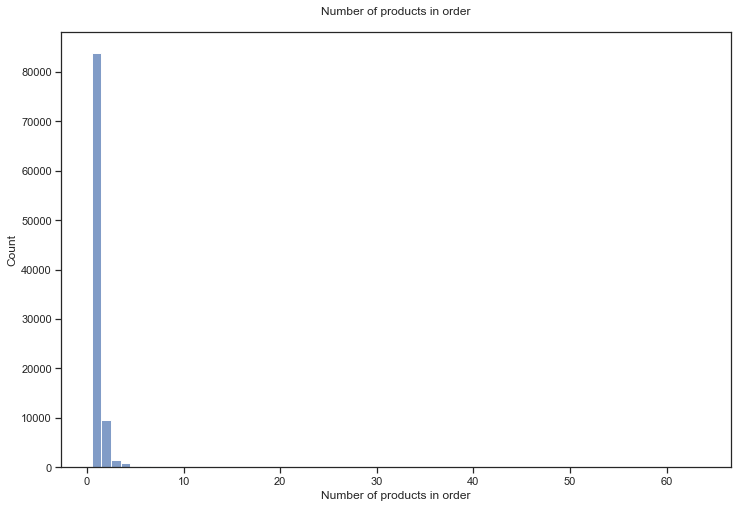

In [605]:
product_per_order = df.groupby(["customer_unique_id", "order_id"])\
                        .agg({"product_id": "count"})

# Plot density of number product in order
fig = plt.figure(figsize=(12, 8))
sns.histplot(data = product_per_order,
             x="product_id",
             discrete=True, alpha=0.7)
plt.xlabel("Number of products in order")
plt.title(f"Number of products in order\n")
plt.show()

In [606]:
review_per_order = df.groupby(["customer_unique_id", "order_id"])\
                        .agg({"review_id": "count",
                              "review_score": "mean"})


In [607]:
df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,price,freight_value,...,order_purchase_year,order_purchase_month,order_purchase_dayofweek,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,review_id,review_score
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,79.80,19.53,...,2018,4,2,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG,home_furniture,4ce650e117a5b292bf5ea980a61eb61e,1
1,d86305c284cecff56c7ee9d3fbd4f8d6,1,credit_card,4,93.72,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,79.80,13.92,...,2018,4,6,550a1a0e8ad53e4147e6c761b5699c2b,14781,barretos,SP,home_furniture,ec9d84039245b981ebdbf7d16c723b6e,4
2,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,1,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,17.00,7.39,...,2018,6,1,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP,other,ad2036caca61484fc435d7e673c020f2,5
3,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,1,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,56.99,8.72,...,2017,12,1,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,SP,health_beauty,bcddfa0f7d2e54cfc74bae4f01b84d92,5
4,6df674fd09d933a85574460e32a94e23,1,credit_card,2,65.71,1,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,56.99,8.72,...,2018,2,1,4847d361361a3440824346865cf03f83,13308,itu,SP,health_beauty,526397ef31c4d8b684347b3aef5f03f3,4


In [608]:
df.drop(['order_item_id',
         'order_id',
        'product_id',
        'review_id',
        'review_score'], axis=1, inplace =True)

In [609]:
df = pd.merge(df, product_per_order,
                how="left",
                on="customer_unique_id")

df= df.rename(columns={"product_id": "nb_products"})

In [610]:
df = pd.merge(df, category_per_customer,
                how="left",
                on="customer_unique_id")

In [611]:
df = pd.merge(df, review_per_order,
                       how="left",
                       on="customer_unique_id")

df =df.rename(columns={"review_id": "nb_review",
                          "review_score": "review_score_mean"})

In [612]:
df = pd.merge(df, order_per_customer,
                how="left",
                on="customer_unique_id")

df= df.rename(columns={"order_id": "nb_orders"}) 

In [613]:
df.head()

,payment_sequential,payment_type,payment_installments,payment_value,seller_id,price,freight_value,customer_id,order_purchase_timestamp,order_delivered_customer_date,...,health_beauty,home_furniture,other,sport,technology,toys_baby,nb_items,nb_review,review_score_mean,nb_orders
0,1,credit_card,8,99.33,213b25e6f54661939f11710a6fddb871,79.80,19.53,0a8556ac6be836b46b3e89920d59291c,2018-04-25 22:01:49,2018-05-09 17:36:51,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,1.0,1
1,1,credit_card,4,93.72,213b25e6f54661939f11710a6fddb871,79.80,13.92,0e37385834260d6111727103a93e790a,2018-04-15 22:53:59,2018-04-20 00:07:39,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,4.0,1
2,1,credit_card,1,24.39,eaf6d55068dea77334e8477d3878d89e,17.00,7.39,f2c7fc58a9de810828715166c672f10a,2018-06-26 11:01:38,2018-06-29 20:32:09,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,5.0,1
3,1,credit_card,1,65.71,cc419e0650a3c5ba77189a1882b7556a,56.99,8.72,25b14b69de0b6e184ae6fe2755e478f9,2017-12-12 11:19:55,2017-12-18 17:24:41,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,5.0,1
4,1,credit_card,2,65.71,cc419e0650a3c5ba77189a1882b7556a,56.99,8.72,49a332427c5be4c418541be8753c5238,2018-02-13 18:37:48,2018-02-16 17:48:45,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,4.0,1


In [614]:
# delivery_delta_days
df["delivery_delta_days"] = (df.order_delivered_customer_date
                               - df.order_purchase_timestamp)\
                              .dt.round('1d').dt.days

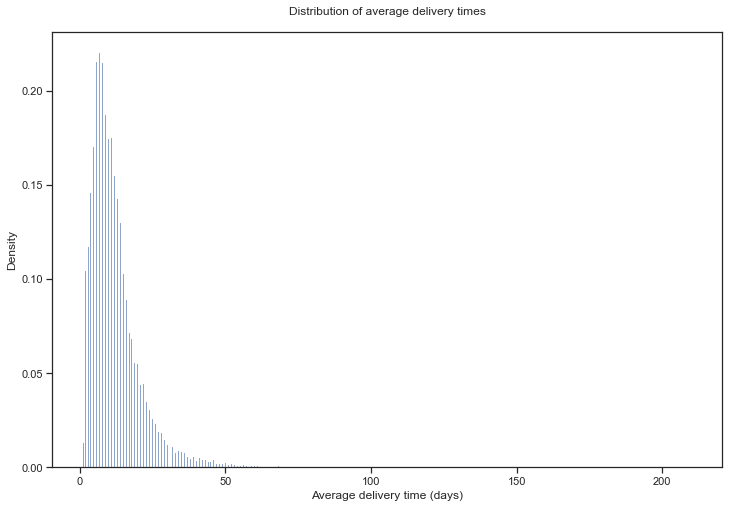

In [615]:
fig = plt.figure(figsize=(12, 8))
sns.histplot(data=df, x="delivery_delta_days",
             stat="density", alpha=0.7)
plt.xlabel("Average delivery time (days)")
plt.title(f"Distribution of average delivery times\n")
plt.show()

In [616]:
# displaying summary staticstics of columns
df.describe()

,payment_sequential,payment_installments,payment_value,price,freight_value,order_purchase_year,order_purchase_month,order_purchase_dayofweek,customer_zip_code_prefix,nb_products,...,home_furniture,other,sport,technology,toys_baby,nb_items,nb_review,review_score_mean,nb_orders,delivery_delta_days
count,154783.000000,154783.000000,154783.000000,154783.000000,154783.000000,154783.000000,154783.000000,154783.000000,154783.000000,154783.000000,...,154783.000000,154783.000000,154783.000000,154783.000000,154783.000000,154783.000000,154783.000000,154783.000000,154783.000000,154775.000000
mean,1.100521,3.038137,169.249701,113.106884,19.490143,2017.520658,6.069407,2.721048,34187.209590,1.717779,...,0.344004,0.121893,0.089474,0.136624,0.059671,3.019046,1.717779,4.112183,1.837689,12.168412
std,0.771169,2.897980,252.048893,169.402115,14.932593,0.504964,3.246767,1.955482,29820.637529,2.680037,...,0.456134,0.305506,0.266758,0.333433,0.226474,4.843123,2.680037,1.327615,2.304928,9.111663
min,1.000000,0.000000,0.000000,0.850000,0.000000,2016.000000,1.000000,0.000000,1003.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,59.090000,38.990000,12.790000,2017.000000,3.000000,1.000000,9720.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000,1.000000,6.000000
50%,1.000000,2.000000,106.380000,69.900000,16.110000,2018.000000,6.000000,3.000000,23080.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,5.000000,1.000000,10.000000
75%,1.000000,4.000000,188.405000,129.800000,20.980000,2018.000000,8.000000,4.000000,55644.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,5.000000,2.000000,15.000000
max,26.000000,24.000000,13664.080000,6735.000000,409.680000,2018.000000,12.000000,6.000000,99980.000000,63.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,75.000000,63.000000,5.000000,15.000000,210.000000


In [617]:
df.describe(include='O')

,payment_type,seller_id,customer_id,customer_unique_id,customer_city,customer_state,product_category_name
count,154783,154783,154783,154783,154783,154783,154783
unique,4,2970,96477,93357,4085,27,10
top,credit_card,4a3ca9315b744ce9f8e9374361493884,06ec7aed3161859018db02f695b6600d,8d50f5eadf50201ccdcedfb9e2ac8455,sao paulo,SP,home_furniture
freq,114697,2913,324,3375,27300,67487,53246


In [618]:
# displaying missing value counts and corresponding percentage against total observations
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([missing_values, percentage], axis=1, keys=['Values', 'Percentage']).transpose()

,delivery_delta_days,order_delivered_customer_date,order_purchase_timestamp,customer_zip_code_prefix,customer_unique_id,order_purchase_dayofweek,order_purchase_month,order_purchase_year,customer_id,nb_orders,...,health_beauty,home_furniture,other,sport,technology,toys_baby,nb_items,nb_review,review_score_mean,payment_sequential
Values,8.000000,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percentage,0.005169,0.005169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [619]:
# dropping missing values
df.dropna(inplace=True)
df.isnull().values.any()

False

In [620]:
# displaying dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154775 entries, 0 to 154782
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   payment_sequential             154775 non-null  int64         
 1   payment_type                   154775 non-null  object        
 2   payment_installments           154775 non-null  int64         
 3   payment_value                  154775 non-null  float64       
 4   seller_id                      154775 non-null  object        
 5   price                          154775 non-null  float64       
 6   freight_value                  154775 non-null  float64       
 7   customer_id                    154775 non-null  object        
 8   order_purchase_timestamp       154775 non-null  datetime64[ns]
 9   order_delivered_customer_date  154775 non-null  datetime64[ns]
 10  order_purchase_year            154775 non-null  int64         
 11  

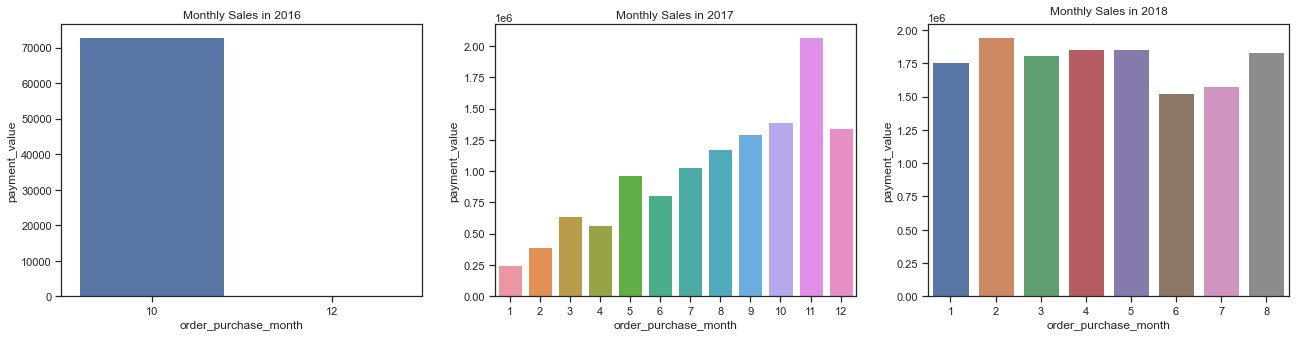

In [621]:
# annual and monthly sales
df_sales = df.groupby(['order_purchase_year', 'order_purchase_month'], 
                      as_index=False).sum().loc[:, ['order_purchase_year', 
                                                    'order_purchase_month', 'payment_value']]

df_s2016 = df_sales[df_sales['order_purchase_year']==2016]
df_s2017 = df_sales[df_sales['order_purchase_year']==2017]
df_s2018 = df_sales[df_sales['order_purchase_year']==2018]

fig, axs = plt.subplots(1, 3, figsize=(22, 5))
sns.barplot(data=df_s2016, x='order_purchase_month', y='payment_value',  ax=axs[0])
sns.barplot(data=df_s2017, x='order_purchase_month', y='payment_value', ax=axs[1])
sns.barplot(data=df_s2018, x='order_purchase_month', y='payment_value', ax=axs[2])
axs[0].set_title('Monthly Sales in 2016')
axs[1].set_title('Monthly Sales in 2017')
axs[2].set_title('Monthly Sales in 2018', pad=10)
plt.show()


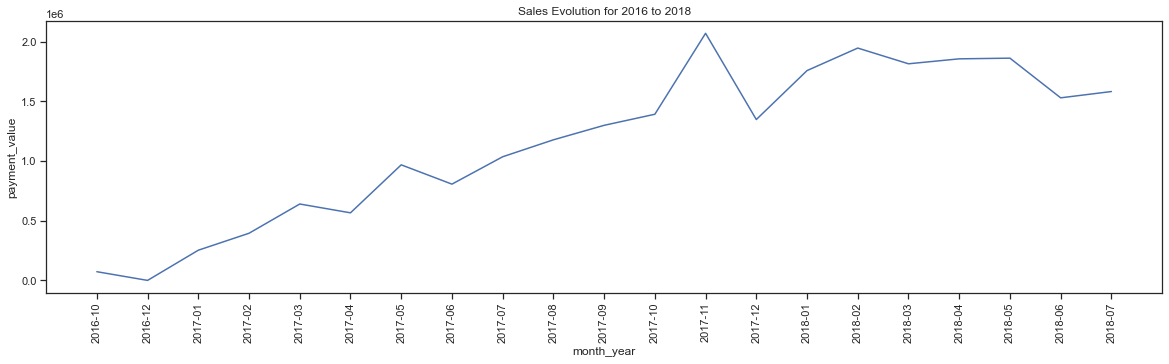

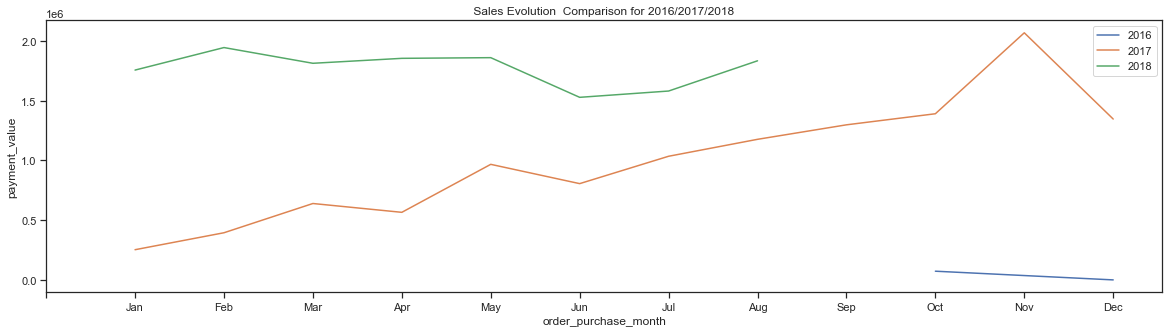

In [622]:
# Changing the month attribute for correct ordenation
df_sales['order_purchase_month'] = df_sales['order_purchase_month'].astype(str).apply(lambda x: '0' + x if len(x) == 1 else x)

# Creating new year-month column
df_sales['month_year'] = df_sales['order_purchase_year'].astype(str) + '-' + df_sales['order_purchase_month'].astype(str)
df_sales['order_purchase_month'] = df_sales['order_purchase_month'].astype(int)

# PLotting
fig, ax = plt.subplots(figsize=(20, 5))
ax = sns.lineplot(data=df_sales.iloc[:-1, :], x='month_year', y='payment_value')
# format.spines(ax, right_border=False)
ax.tick_params(axis='x', labelrotation=90)
ax.set_title('Sales Evolution for 2016 to 2018')
plt.show()

fig, ax = plt.subplots(figsize=(20, 5))

ax = sns.lineplot(data=df_s2016, x='order_purchase_month', y='payment_value',  label='2016')
ax = sns.lineplot( data=df_s2017, x='order_purchase_month', y='payment_value', label='2017')
ax = sns.lineplot(data=df_s2018,x='order_purchase_month', y='payment_value',  label='2018')
# format.spines(ax, right_border=False)
ax.set_title(' Sales Evolution  Comparison for 2016/2017/2018 ')
plt.xticks(np.arange(13), ['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


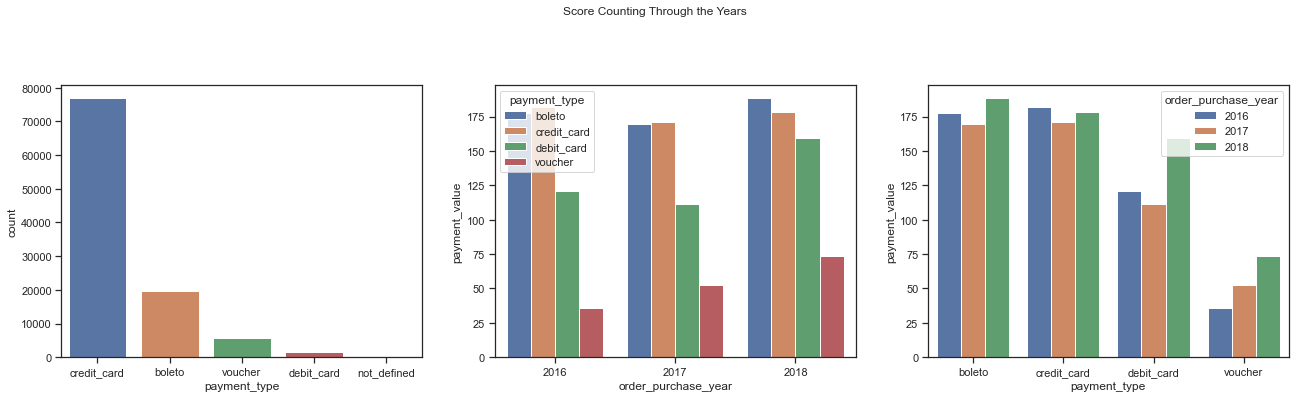

In [623]:
df_payment = df.groupby(['order_purchase_year', 'payment_type'], as_index=False).sum().loc[:, ['order_purchase_year', 'payment_type', 'payment_value']]
df_payment = df.groupby(['order_purchase_year', 'payment_type'], as_index=False).mean().loc[:, ['order_purchase_year', 'payment_type', 'payment_value']]

# displaying total orders in years, comparitive year on month, and month on days of the week
fig, axs = plt.subplots(1, 3, figsize=(22, 5))
sns.countplot(x='payment_type', data=order_payments, ax=axs[0])
sns.barplot(x='order_purchase_year', y='payment_value', ax=axs[1], hue='payment_type', data=df_payment.sort_values(by='payment_value', ascending=False))
sns.barplot(x='payment_type', y='payment_value', ax=axs[2], hue='order_purchase_year', data=df_payment.sort_values(by='payment_value', ascending=False))

# format_spines(ax, right_border=False)
plt.suptitle('Score Counting Through the Years', y=1.1)
plt.show()

In [624]:
# create a dataframe contaning CustomerID and first purchase date
df_first_purchase = df.groupby('customer_unique_id').order_purchase_timestamp.min().reset_index()
df_first_purchase.columns = ['customer_unique_id','First_purchase_date']
df_first_purchase['First_purchase_date'] = df_first_purchase['First_purchase_date'].map(lambda date: 100*date.year + date.month)

# merge first purchase date column to our main dataframe 
df = pd.merge(df, df_first_purchase, on='customer_unique_id')


In [625]:
# gets the Last purchase date for each customer and create a dataframe with it
df_last_purchase = df.groupby('customer_unique_id').order_purchase_timestamp.max().reset_index()
df_last_purchase.columns = ['customer_unique_id', 'Last_Purchase_Date']
df_last_purchase['Last_Purchase_Date'] = df_last_purchase['Last_Purchase_Date'].map(lambda date: 100*date.year + date.month)

# merge first purchase date column to our main dataframe 
df = pd.merge(df, df_last_purchase, on='customer_unique_id')

In [626]:
df.head()

,payment_sequential,payment_type,payment_installments,payment_value,seller_id,price,freight_value,customer_id,order_purchase_timestamp,order_delivered_customer_date,...,sport,technology,toys_baby,nb_items,nb_review,review_score_mean,nb_orders,delivery_delta_days,First_purchase_date,Last_Purchase_Date
0,1,credit_card,8,99.33,213b25e6f54661939f11710a6fddb871,79.80,19.53,0a8556ac6be836b46b3e89920d59291c,2018-04-25 22:01:49,2018-05-09 17:36:51,...,0.0,0.0,0.0,1.0,1,1.0,1,14.0,201804,201804
1,1,credit_card,4,93.72,213b25e6f54661939f11710a6fddb871,79.80,13.92,0e37385834260d6111727103a93e790a,2018-04-15 22:53:59,2018-04-20 00:07:39,...,0.0,0.0,0.0,1.0,1,4.0,1,4.0,201804,201804
2,1,credit_card,1,24.39,eaf6d55068dea77334e8477d3878d89e,17.00,7.39,f2c7fc58a9de810828715166c672f10a,2018-06-26 11:01:38,2018-06-29 20:32:09,...,0.0,0.0,0.0,1.0,1,5.0,1,3.0,201806,201806
3,1,credit_card,1,65.71,cc419e0650a3c5ba77189a1882b7556a,56.99,8.72,25b14b69de0b6e184ae6fe2755e478f9,2017-12-12 11:19:55,2017-12-18 17:24:41,...,0.0,0.0,0.0,1.0,1,5.0,1,6.0,201712,201712
4,1,credit_card,2,65.71,cc419e0650a3c5ba77189a1882b7556a,56.99,8.72,49a332427c5be4c418541be8753c5238,2018-02-13 18:37:48,2018-02-16 17:48:45,...,0.0,0.0,0.0,1.0,1,4.0,1,3.0,201802,201802


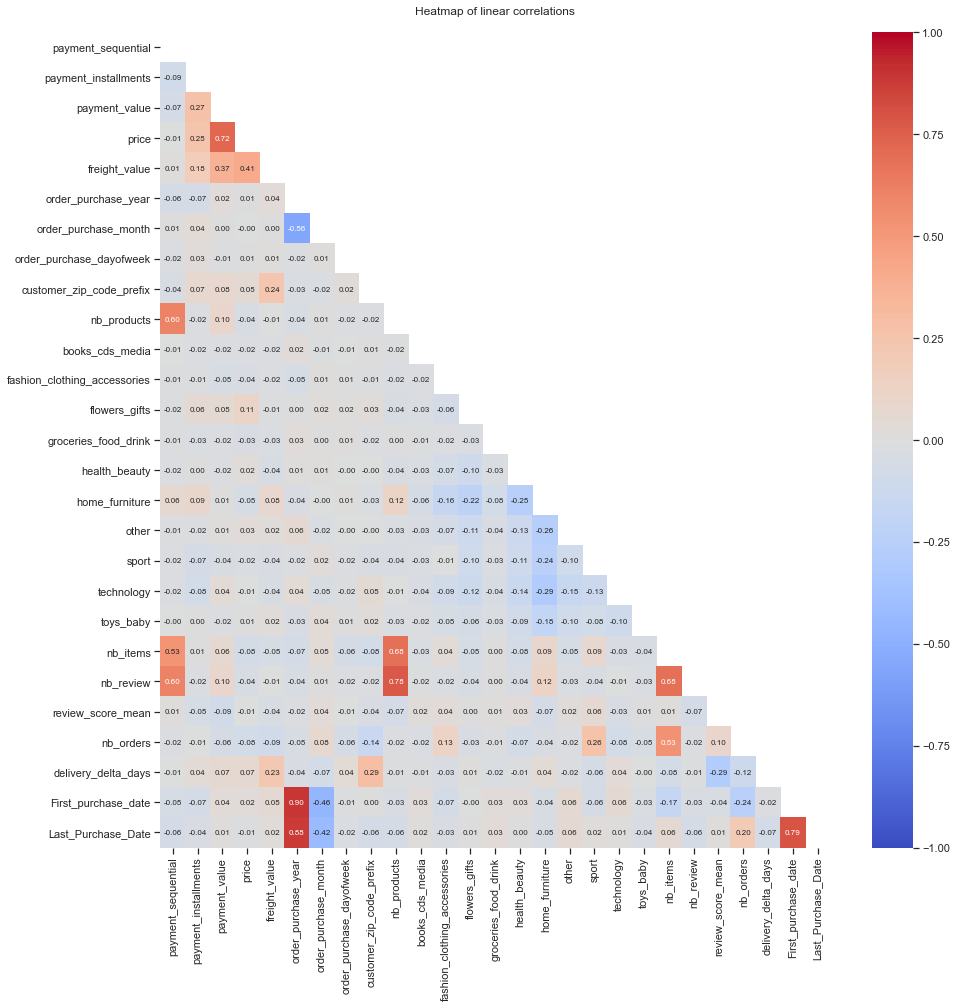

In [627]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr, annot=True,
                 vmin=-1, vmax=1,
                 fmt=".2f", annot_kws={'size':8}, 
                 mask=mask, 
                 center=0, 
                 cmap="coolwarm")
plt.title(f"Heatmap of linear correlations\n" 
          )
plt.show()

In [628]:
data1=df[['order_purchase_year', 'First_purchase_date']]
data1

,order_purchase_year,First_purchase_date
0,2018,201804
1,2018,201804
2,2018,201806
3,2017,201712
4,2018,201802
...,...,...
154770,2017,201704
154771,2017,201711
154772,2018,201808
154773,2017,201711


In [629]:
data2=df[['payment_value', 'price', 'freight_value']]
data2

,payment_value,price,freight_value
0,99.33,79.80,19.53
1,93.72,79.80,13.92
2,24.39,17.00,7.39
3,65.71,56.99,8.72
4,65.71,56.99,8.72
...,...,...,...
154770,93.97,69.00,24.97
154771,83.09,74.82,8.27
154772,26.37,18.98,7.39
154773,60.69,44.90,15.79


In [630]:
df.drop(['order_purchase_year',
        'price',
        'freight_value'], axis=1, inplace=True)

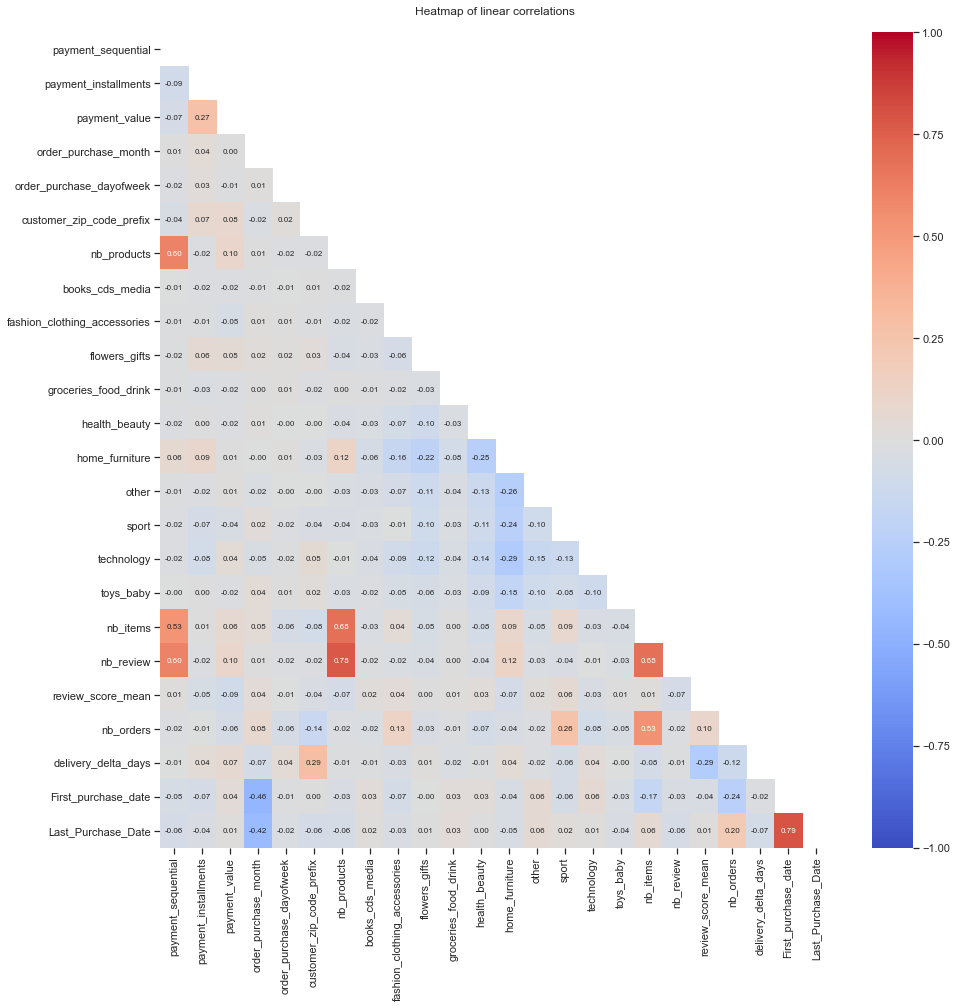

In [631]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr, annot=True,
                 vmin=-1, vmax=1,
                 fmt=".2f", annot_kws={'size':8}, 
                 mask=mask, 
                 center=0, 
                 cmap="coolwarm")
plt.title(f"Heatmap of linear correlations\n" 
          )
plt.show()

In [632]:
df.to_csv("projet4_segmentation.csv")